In [2]:
import os
import re

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from hnetwork import HNetwork
from visualisation import *

In [3]:
def apply_noise(pattern, noise):
    noise = (np.random.random(size=pattern.shape) > noise) * 2 - 1
    return pattern * noise

In [88]:
datasets = {}
datasets_flat = {}
name = 'large-25x25.plus.csv'
path = f'./data/{name}'
shape = tuple(map(lambda x : int(x), reversed(re.search(r'\b\d+x\d+\b', name).group().split('x'))))
patterns = np.genfromtxt(f'{path}', delimiter=',')
datasets[name] = patterns.reshape((-1,) + shape)
datasets_flat[name] = patterns

In [89]:
X = datasets_flat[name]

In [90]:
hn = HNetwork(np.prod(shape), train_rule='oja', update_mode='async')
hn.fit(X, epochs=100, lr=0.0001)

early stopping after 62 epochs


In [91]:
img_idx = 0

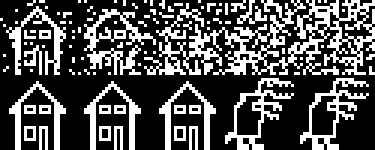

In [106]:
X_noisy = []
Y_pred = []

for img_idx in [1]:
    for noise in [0.1, 0.2, 0.3, 0.4, 0.5]:
        x_noisy = apply_noise(X[img_idx], noise=noise)
        y_pred = hn.predict(x_noisy, epochs=10)

        X_noisy.append(x_noisy.reshape(shape))
        Y_pred.append(y_pred.reshape(shape))

X_noisy = np.array(X_noisy)
Y_pred = np.array(Y_pred)

draw_comparison(X_noisy, Y_pred, scale=3)